In [70]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv('data/netflix_titles.csv.zip', compression='zip')

In [72]:
df.shape

(8807, 12)

In [73]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [74]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [75]:
df.isnull().sum() #df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [76]:
for c in df.columns:
    percentage = df[c].isna().mean()
    print(f'{c} null percentage: {round(percentage*100, 2)}')

show_id null percentage: 0.0
type null percentage: 0.0
title null percentage: 0.0
director null percentage: 29.91
cast null percentage: 9.37
country null percentage: 9.44
date_added null percentage: 0.11
release_year null percentage: 0.0
rating null percentage: 0.05
duration null percentage: 0.03
listed_in null percentage: 0.0
description null percentage: 0.0


In [77]:
''.join(df['rating'].mode())

'TV-MA'

In [78]:
df['rating'].mode().values[0] # can be use to replace the nulls with mode

'TV-MA'

In [79]:
df_movie = df[df['type']=='Movie']

In [80]:
df_movie['duration'].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [81]:
df_movie['duration'].astype('str')

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [82]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [83]:
df_movie['duration'] = df_movie['duration'].astype(str).apply(lambda x: x.replace(' min', ''))
df.dtypes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [86]:
df_movie = df_movie.dropna(subset=['duration'])

<AxesSubplot:xlabel='duration', ylabel='Count'>

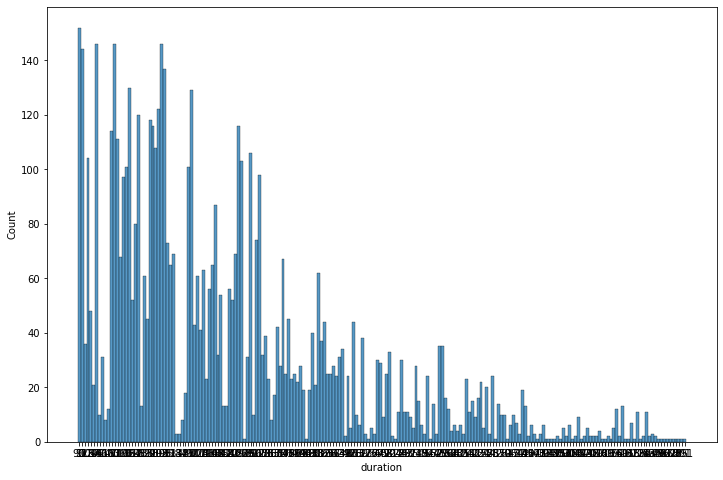

In [92]:
plt.figure(figsize=(12,8))
plt.tight_layout()
sns.histplot(df_movie['duration'], bins=20)

In [100]:
df_movie['duration'].astype(int)

ValueError: invalid literal for int() with base 10: 'nan'

ValueError: invalid literal for int() with base 10: 'nan'

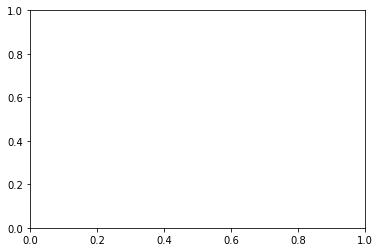

In [98]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=df_movie['duration'].astype(int))
fig.tight_layout()

<AxesSubplot:xlabel='duration', ylabel='Count'>

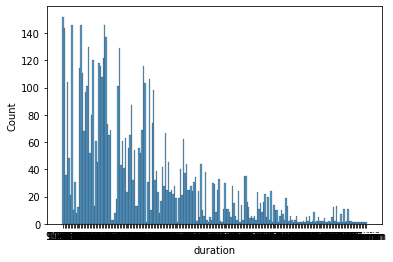

In [25]:
import seaborn as sns
sns.histplot(df_movie['duration'])

In [27]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
fig = go.Figure()
fig.add_box(x=df_movie['minute'], text=df_movie['minute'])
iplot(fig)


ModuleNotFoundError: No module named 'plotly'